In [6]:
import os

folder_path = "Animal/goat"

for i, filename in enumerate(os.listdir(folder_path)):
    old_path = os.path.join(folder_path, filename)
    new_path = os.path.join(folder_path, f"goat{i+1}.jpeg")  # Change extension if needed
    os.rename(old_path, new_path)

print("Renaming complete!")

Renaming complete!


In [7]:
folder_path = "Animal/cow"

for i, filename in enumerate(os.listdir(folder_path)):
    old_path = os.path.join(folder_path, filename)
    new_path = os.path.join(folder_path, f"cow{i+1}.jpeg")  # Change extension if needed
    os.rename(old_path, new_path)

print("Renaming complete!")

Renaming complete!


In [8]:
folder_path = "Animal/buffalo"

for i, filename in enumerate(os.listdir(folder_path)):
    old_path = os.path.join(folder_path, filename)
    new_path = os.path.join(folder_path, f"buffalo{i+1}.jpeg")  # Change extension if needed
    os.rename(old_path, new_path)

print("Renaming complete!")

Renaming complete!


In [20]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
image_path = "Animal/cow/cow1.jpeg"
image = Image.open(image_path)

# Show the image
image.show()

In [17]:
image_path = "Animal/goat/goat1.jpeg"
image = Image.open(image_path)

# Show the image
image.show()

In [18]:
image_path = "Animal/buffalo/buffalo1.jpeg"
image = Image.open(image_path)

# Show the image
image.show()

In [63]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes (cow, buffalo, goat)
])

In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values
    rotation_range=30,      # Rotate images up to 30 degrees
    width_shift_range=0.2,  # Shift image horizontally
    height_shift_range=0.2, # Shift image vertically
    shear_range=0.2,        # Apply shearing
    zoom_range=0.2,         # Zoom in/out
    horizontal_flip=True,   # Flip images horizontally
    fill_mode='nearest',    # Fill missing pixels
    validation_split=0.2    # 20% data for validation
)

# Load and augment training data
train_data = train_datagen.flow_from_directory(
    "Animal/",  # Path to your dataset folder
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="training"  # Use this for training data
)

# Load and preprocess validation data (without augmentation)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data = val_datagen.flow_from_directory(
    "Animal/",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"  # Use this for validation data
)

Found 557 images belonging to 3 classes.
Found 137 images belonging to 3 classes.


In [70]:
history = model.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
18/18 [==============================] - 6s 345ms/step - loss: 0.7957 - accuracy: 0.6517 - val_loss: 0.7077 - val_accuracy: 0.7226
Epoch 2/20
18/18 [==============================] - 6s 315ms/step - loss: 0.7396 - accuracy: 0.7020 - val_loss: 0.6646 - val_accuracy: 0.7372
Epoch 3/20
18/18 [==============================] - 6s 312ms/step - loss: 0.8192 - accuracy: 0.6355 - val_loss: 0.7219 - val_accuracy: 0.7226
Epoch 4/20
18/18 [==============================] - 6s 319ms/step - loss: 0.7701 - accuracy: 0.6571 - val_loss: 0.6450 - val_accuracy: 0.7299
Epoch 5/20
18/18 [==============================] - 6s 314ms/step - loss: 0.6950 - accuracy: 0.7002 - val_loss: 0.8879 - val_accuracy: 0.6058
Epoch 6/20
18/18 [==============================] - 6s 321ms/step - loss: 0.8070 - accuracy: 0.6750 - val_loss: 0.6600 - val_accuracy: 0.7299
Epoch 7/20
18/18 [==============================] - 7s 366ms/step - loss: 0.7455 - accuracy: 0.7056 - val_loss: 0.6386 - val_accuracy: 0.7226
Epoch 

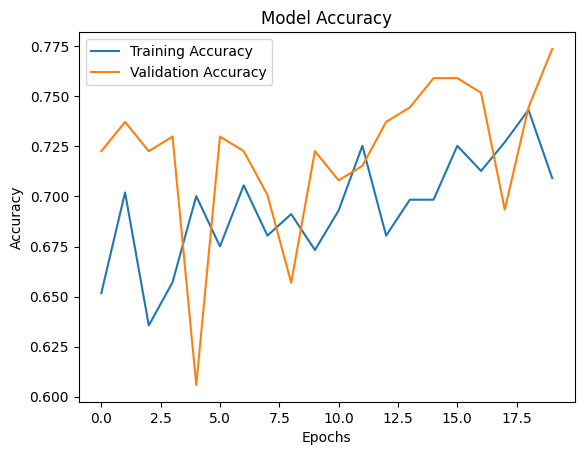

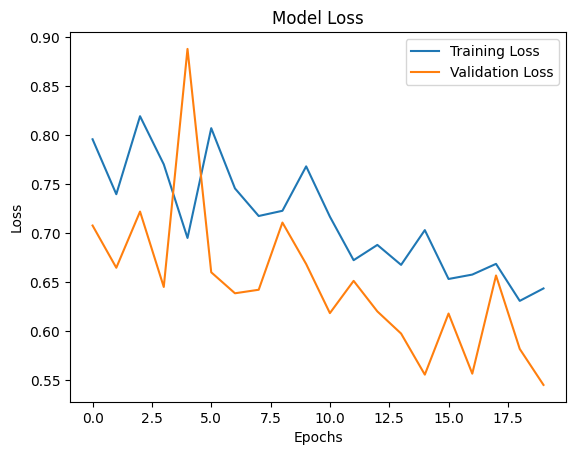

In [71]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [72]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory("Animal/", target_size=(128, 128), batch_size=32, class_mode="categorical")

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Found 694 images belonging to 3 classes.
22/22 [==============================] - 3s 151ms/step - loss: 0.4924 - accuracy: 0.8069
Test Accuracy: 80.69%


In [77]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = "Animal/buffalo/buffalo23.jpeg"
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Reshape for model input

# Make prediction
predictions = model.predict(img_array)
class_names = ["Buffalo","Cow", "Goat"]  # Update based on your classes
predicted_class = class_names[np.argmax(predictions)]
print(f"Predicted Class: {predicted_class}")

1/1 [==============================] - 0s 24ms/step
Predicted Class: Buffalo
